In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams
import seaborn as sns
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Loading Dataset

In [2]:
mydata=pd.read_csv('AB_NYC_2019.csv')
mydata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Preprocessing

In [3]:
mydata.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
#Converting column Last_review to datetime type from type object
mydata["last_review"] = pd.to_datetime(mydata["last_review"])
mydata.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [5]:
#checking for missing values
mydata.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#Deleting null values of no importance. Note: Reviews per month column had a lot of missing rows but is important for analysis,hence missing values will be replaced with the mean of that column.

mydata['reviews_per_month'].fillna(mydata['reviews_per_month'].mean(),inplace=True)
mydata.drop(columns=['host_name', 'last_review'], axis=1, inplace=True)
mydata.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

### Exploratory Data Analysis

Correlation

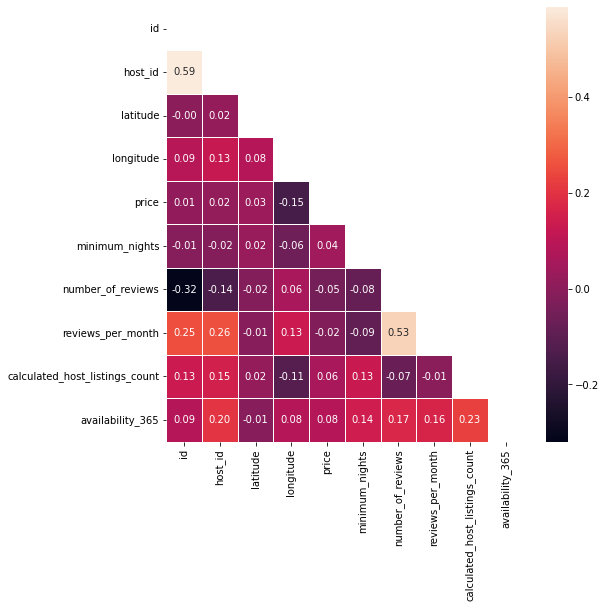

In [7]:
import seaborn as sns
corr_1 = mydata.corr()
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr_1)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

#Correlation heatmap shows a high correlation between number of reviews and reviews per month.

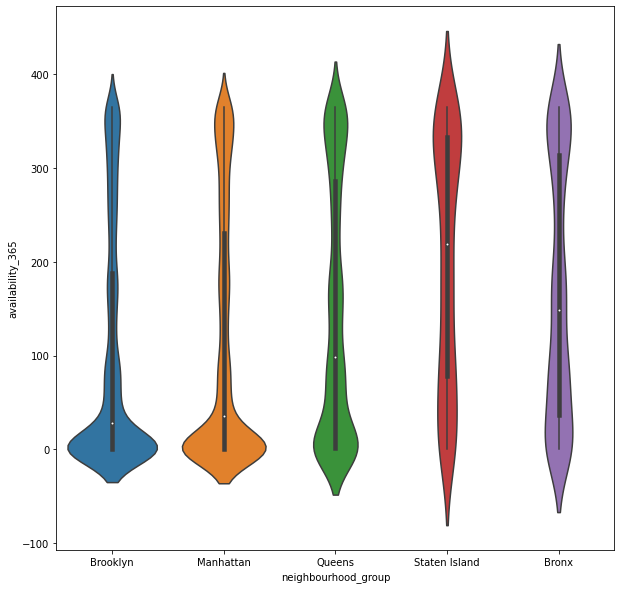

In [8]:
#Relation between neighbourhood group and availability
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=mydata, x="neighbourhood_group", y="availability_365")
#Violin Plot shows that Staten Island has the highest mean availability value around 220-250 days compared to others

<Axes: xlabel='neighbourhood_group', ylabel='price'>

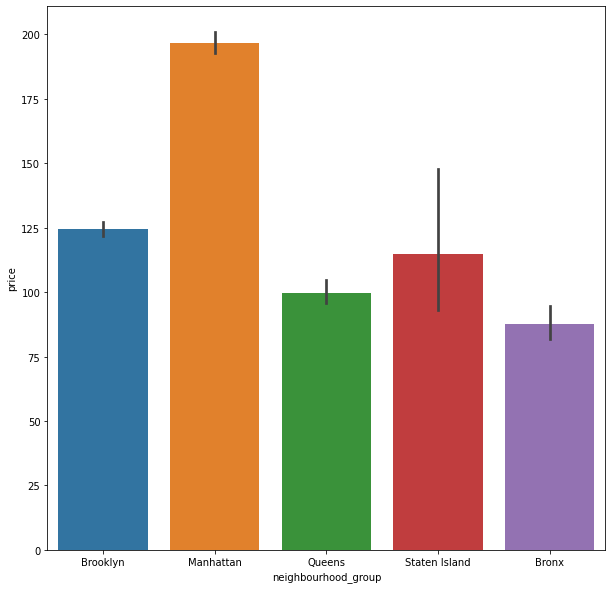

In [9]:
#Relation between neighbourhood group and price
plt.figure(figsize=(10,10))
sns.barplot(data=mydata, x='neighbourhood_group', y='price')
#Result shows that Manhattan has the most expensive prices.

In [ ]:
# #Scatterplot to visualise latitude and longitude 
# plt.figure(figsize=(10,6))
# sns.scatterplot(mydata.longitude,mydata.latitude,hue=mydata.neighbourhood_group)
# plt.ioff()
# #Result shows density is high for manhattan and brooklyn

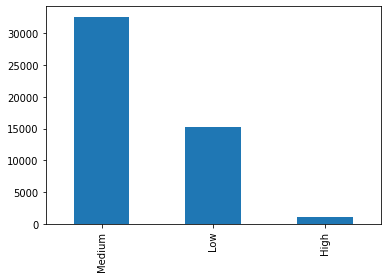

In [10]:
# Categorising rooms based on prices.
# Prices < 75 dollars are low, 75 < 500 dollars are medium and  500 dollars< high
def categorise(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'
mydata['price'].apply(categorise).value_counts().plot(kind='bar');

#Most of the rooms fall in the Medium (75-500 $) category followed by Low and High range rooms.Very few people prefer to live in high priced rooms.

<Figure size 720x432 with 0 Axes>

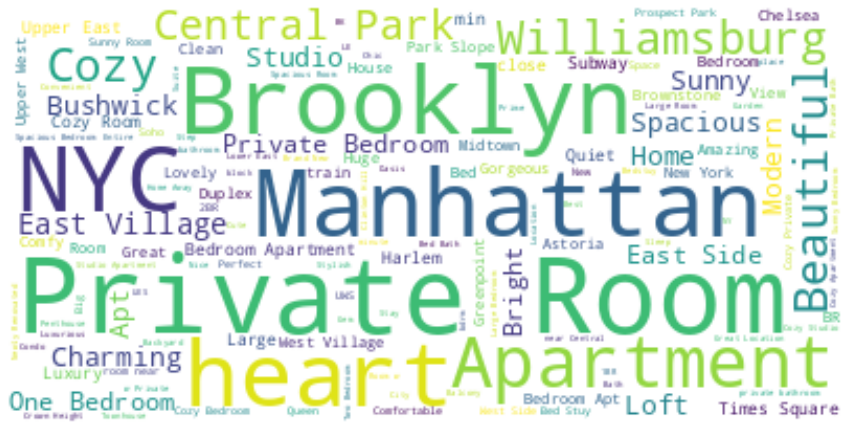

In [11]:
#word cloud to analyse names of listings 

import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in mydata.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

#Our word cloud shows the words that are more often used in the Name of this listings
#Result shows that most of the words are related to the description,place and the experience in the room.

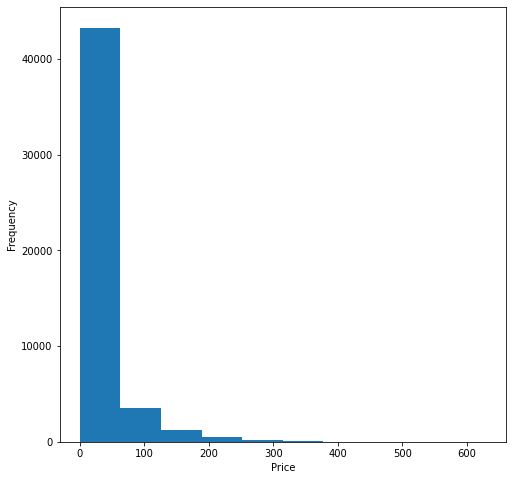

In [12]:
#Analysing number of reviews
plt.figure(figsize=(8,8))
mydata['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

#From the histogram we can see that low cost rooms or in range 0-50 $ have more reviews.
#This shows us that people who pay more for the rooms generally dont write reviews.

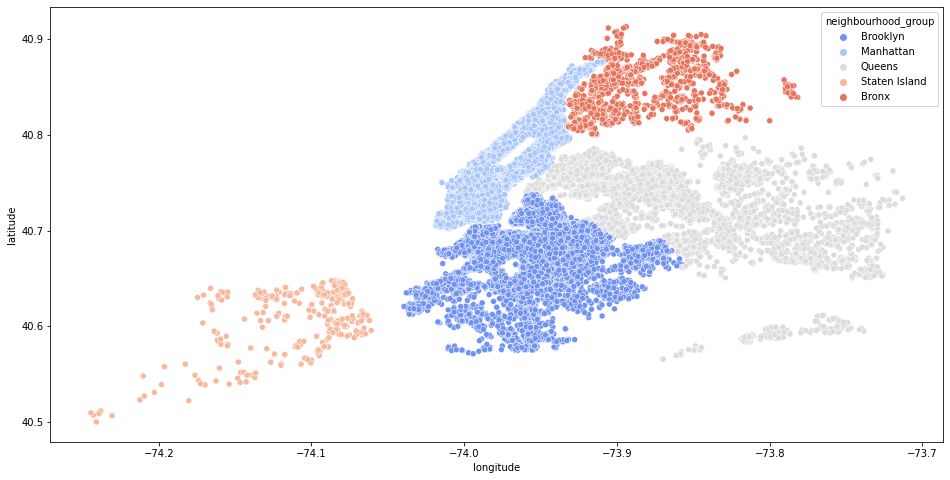

In [16]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=mydata.latitude,x=mydata.longitude,hue=mydata.neighbourhood_group,palette="coolwarm")
plt.show()

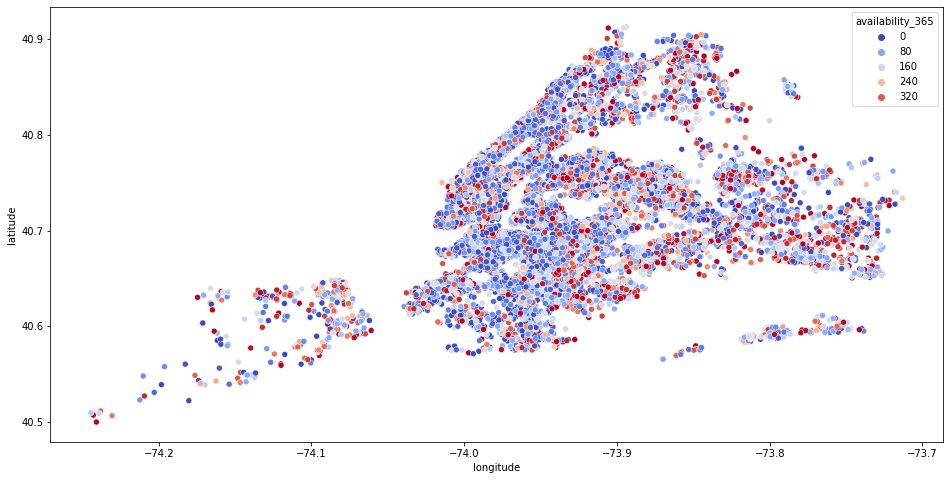

In [17]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=mydata.latitude,x=mydata.longitude,hue=mydata.availability_365,palette="coolwarm")
plt.show()

In [18]:
_names_=[]
#getting name strings from the column and appending it to the list
for name in mydata.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

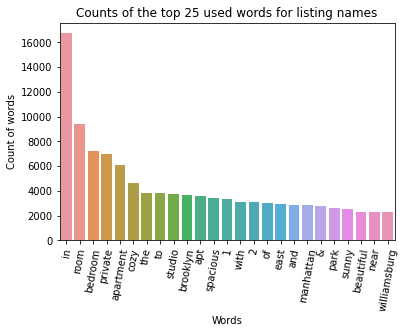

In [19]:
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)
bar=sns.barplot(x='Words', y='Count', data=sub_w)
bar.set_title('Counts of the top 25 used words for listing names')
bar.set_ylabel('Count of words')
bar.set_xlabel('Words')
bar.set_xticklabels(bar.get_xticklabels(), rotation=80)

# Data Cleaning

Price prediction based on name

In [ ]:
mydata['name'].isnull().sum()

16

In [ ]:
#There are 16 names fields as NaN. Replace them with empty string.
mydata['name'].fillna('', inplace=True)
mydata['name'].isnull().sum()

0

In [ ]:
#Remove punctuation, digits and special characters.
import re
def remove_punctuation_digits_specialchar(line):
    return re.sub('[^A-Za-z]+', ' ', line).lower()

mydata['clean_name'] = mydata['name'].apply(remove_punctuation_digits_specialchar)
# Compare raw and cleaned texts.
mydata[['name', 'clean_name']].head()

,name,clean_name
0,Clean & quiet apt home by the park,clean quiet apt home by the park
1,Skylit Midtown Castle,skylit midtown castle
2,THE VILLAGE OF HARLEM....NEW YORK !,the village of harlem new york
3,Cozy Entire Floor of Brownstone,cozy entire floor of brownstone
4,Entire Apt: Spacious Studio/Loft by central park,entire apt spacious studio loft by central park


In [ ]:
# remove stop words
def tokenize_no_stopwords(line):
    tokens = nltk.tokenize.word_tokenize(line)
    tokens_no_stop = [w for w in tokens if w not in stopwords.words('english')]
    return " ".join(tokens_no_stop)
mydata['final_name'] = mydata['clean_name'].apply(tokenize_no_stopwords)
mydata[['clean_name', 'final_name']].head()

,clean_name,final_name
0,clean quiet apt home by the park,clean quiet apt home park
1,skylit midtown castle,skylit midtown castle
2,the village of harlem new york,village harlem new york
3,cozy entire floor of brownstone,cozy entire floor brownstone
4,entire apt spacious studio loft by central park,entire apt spacious studio loft central park


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report, mean_absolute_error, r2_score
from imblearn.over_sampling import RandomOverSampler
OS = RandomOverSampler(sampling_strategy='auto', random_state=0)
def classify_as_cheap_or_expensive(line):
    if line > 300:
        return 1
    else:
        return 0
        
mydata['target'] = mydata['price'].apply(classify_as_cheap_or_expensive)
mydata['target'].value_counts()
train, test = train_test_split(mydata, test_size=0.2, random_state=315, stratify=mydata['target'])

X_train, y_train = train['final_name'], train['target']
X_test, y_test = test['final_name'], test['target']
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
ros = RandomOverSampler(sampling_strategy='minority', random_state=1)

X_train_ros, y_train_ros = OS.fit_resample(X_train, y_train)

lr = LGBMClassifier(random_state=315)
lr.fit(X_train_ros, y_train_ros)
preds = lr.predict(X_test)

print(classification_report(y_test, preds))
print("Accuracy: {0:.3f}".format(accuracy_score(y_test, preds)))
print("Recall: {0:.3f}".format(recall_score(y_test, preds)))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      9108
           1       0.22      0.70      0.33       671

    accuracy                           0.81      9779
   macro avg       0.60      0.76      0.61      9779
weighted avg       0.92      0.81      0.85      9779

Accuracy: 0.809
Recall: 0.696


In [ ]:
mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,clean_name,final_name,target
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,clean quiet apt home by the park,clean quiet apt home park,0
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,skylit midtown castle,skylit midtown castle,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,the village of harlem new york,village harlem new york,0
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,cozy entire floor of brownstone,cozy entire floor brownstone,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,entire apt spacious studio loft by central park,entire apt spacious studio loft central park,0


In [ ]:
mydata.drop(columns=['target', 'clean_name'], axis=1, inplace=True)
mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,final_name
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,clean quiet apt home park
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,village harlem new york
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,cozy entire floor brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,entire apt spacious studio loft central park


### TEST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
mydata=mydata[mydata.price>0]
mydata=mydata[mydata.availability_365>0]
selected_feature = ['neighbourhood_group','neighbourhood','latitude','longitude','number_of_reviews','room_type','minimum_nights',\
                    'reviews_per_month','calculated_host_listings_count','availability_365','host_id']
X = mydata[selected_feature]
y = np.log10(mydata['price'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#define numerical and categorical columns
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)
print(numerical_columns)
print(categorical_columns)

['latitude', 'longitude', 'number_of_reviews', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'host_id']
['neighbourhood_group', 'neighbourhood', 'room_type']


In [ ]:
#define preprocessor to all selected columns
preprocessor = ColumnTransformer([
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ('standard_scaler', StandardScaler(), numerical_columns)])

LASSO MODEL

In [ ]:
from sklearn import linear_model
from sklearn import metrics
Lasso_model = make_pipeline(preprocessor, linear_model.Lasso(alpha = 0.001))
Lasso_model.fit(X_train, y_train)
y_predicts = Lasso_model.predict(X_test) 
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.21628893894549472
        R2 Score: 52.25214384704109
        Mean Absolute Error: 0.15665764443192828
     


RIDGE MODEL

In [ ]:
from sklearn import linear_model
ridge_model = make_pipeline(preprocessor, linear_model.Ridge(alpha = 0.001))
ridge_model.fit(X_train, y_train)             
y_predicts = ridge_model.predict(X_test) 
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.21030963199441502
        R2 Score: 54.855631375587556
        Mean Absolute Error: 0.15140064828276764
     


DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Reg_tree = make_pipeline(preprocessor, DecisionTreeRegressor(criterion='squared_error',max_depth=3,random_state=0))
Reg_tree=Reg_tree.fit(X_train,y_train)

y_predicts=Reg_tree.predict(X_test)
print("median absolute deviation (MAD): ",np.mean(abs(np.multiply(np.array(y_test.T-y_predicts),np.array(1/y_test)))))
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))

median absolute deviation (MAD):  0.07761681043463436

        Mean Squared Error: 0.2231695229083823
        R2 Score: 49.165913149030814
        Mean Absolute Error: 0.16227903097388993
     


GRADIENT BOOST

In [ ]:
model2 = make_pipeline(preprocessor, GradientBoostingRegressor())
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

# Perform cross-validation using the cross_val_score function
scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='r2')

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Cross-validation R-squared scores: {}".format(scores))
print("Mean R-squared score: {:.3f}".format(np.mean(scores)))
print("Standard deviation of R-squared scores: {:.3f}".format(np.std(scores)))

# Newtrial
# r2 score: 0.570520886831662
# Cross-validation R-squared scores: [0.55271635 0.56773098 0.57681472 0.57374838 0.57016503]
# Mean R-squared score: 0.568
# Standard deviation of R-squared scores: 0.008

r2 score: 0.6050603852476013
Cross-validation R-squared scores: [0.58538392 0.60050488 0.60514151 0.60228942 0.60086583]
Mean R-squared score: 0.599
Standard deviation of R-squared scores: 0.007


In [ ]:
# from random import randint
from scipy.stats import uniform, randint
from sklearn.model_selection import GridSearchCV

# Create a pipeline with XGBoost regressor
model = make_pipeline(preprocessor, xgb.XGBRegressor(objective="reg:linear", random_state=42))

# Define the hyperparameter grids
param_grid = {
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgbregressor__max_depth': [3, 7, 11],
    'xgbregressor__n_estimators': [500, 1000, 2000],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding R-squared score
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best R-squared score: {:.3f}".format(grid_search.best_score_))

# Fit the model using the best hyperparameters
model3 = make_pipeline(preprocessor, xgb.XGBRegressor(
    objective="reg:linear",
    learning_rate=grid_search.best_params_['xgbregressor__learning_rate'],
    max_depth=grid_search.best_params_['xgbregressor__max_depth'],
    n_estimators=grid_search.best_params_['xgbregressor__n_estimators'],
    random_state=42
))

model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Calculate the R-squared score on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: {:.3f}".format(r2))

# Perform cross-validation using the cross_val_score function
scores = cross_val_score(model3, X_train, y_train, cv=5, scoring='r2')

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Cross-validation R-squared scores: {}".format(scores))
print("Mean R-squared score: {:.3f}".format(np.mean(scores)))
print("Standard deviation of R-squared scores: {:.3f}".format(np.std(scores)))

[21:12:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:09] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:07] WARNING: ../src/objective/regression_

XGBOOST (WITH HYPERPARAMETER TUNING)

In [ ]:
# from random import randint
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Create a pipeline with XGBoost regressor
model = make_pipeline(preprocessor, xgb.XGBRegressor(objective="reg:linear", random_state=42))

# Define the hyperparameter distributions
param_dist = {
    'xgbregressor__learning_rate': uniform(0.01, 0.1),
    'xgbregressor__max_depth': randint(3, 11),
    'xgbregressor__n_estimators': randint(500, 2001),
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding R-squared score
print("Best hyperparameters: {}".format(random_search.best_params_))
print("Best R-squared score: {:.3f}".format(random_search.best_score_))

# Fit the model using the best hyperparameters
model3 = make_pipeline(preprocessor, xgb.XGBRegressor(
    objective="reg:linear",
    learning_rate=random_search.best_params_['xgbregressor__learning_rate'],
    max_depth=random_search.best_params_['xgbregressor__max_depth'],
    n_estimators=random_search.best_params_['xgbregressor__n_estimators'],
    random_state=42
))

model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Calculate the R-squared score on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: {:.3f}".format(r2))

# Perform cross-validation using the cross_val_score function
scores = cross_val_score(model3, X_train, y_train, cv=5, scoring='r2')

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Cross-validation R-squared scores: {}".format(scores))
print("Mean R-squared score: {:.3f}".format(np.mean(scores)))
print("Standard deviation of R-squared scores: {:.3f}".format(np.std(scores)))

[22:51:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:30] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:56:15] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:39] WARNING: ../src/objective/regression_

In [ ]:
#Best hyperparameters: {'xgbregressor__learning_rate': 0.01906064345328208, 'xgbregressor__max_depth': 8, 'xgbregressor__n_estimators': 1062}

model3 = make_pipeline(preprocessor,xgb.XGBRegressor(objective="reg:linear", learning_rate = 0.05, random_state=42, n_estimators = 1000, max_depth = 10))
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

# Perform cross-validation using the cross_val_score function
scores = cross_val_score(model3, X_train, y_train, cv=5, scoring='r2')

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Cross-validation R-squared scores: {}".format(scores))
print("Mean R-squared score: {:.3f}".format(np.mean(scores)))
print("Standard deviation of R-squared scores: {:.3f}".format(np.std(scores)))

# trail0: 0.556
# trail2: 0.564
# 0.571 learning_rate = 0.05, random_state=42, n_estimators = 800, max_depth = 7))

[01:39:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
r2 score: 0.6445812414407168
[01:40:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:37] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:43:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation R-squared scores: [0.61845542 0.63854346 0.63681897 0.6267451  0.6347052 ]
Mean R-squared score: 0.631
Standard deviation of R-squared scores: 0.007
